<a href="https://colab.research.google.com/github/Maxxx-VS/The-Founder/blob/master/42_3_RL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Установка необходимых библиотек
%%capture
!pip install "gymnasium[atari]"
!pip install autorom[accept-rom-license]

In [13]:
# Импорт необходимых библиотек + регистрация окружения
import gymnasium as gym
import ale_py
import torch
import numpy as np
import matplotlib.pyplot as plt
from IPython import display as ipythondisplay
gym.register_envs(ale_py)

In [16]:
# Создаем окружение с игрой
env = gym.make("ALE/Enduro-v5")

In [17]:
# Проверяем кол-во действий
n_state = env.observation_space.shape[0]
print(f'Размерности пространств наблюдений и действий: {n_state}, {n_action}')

NameError: name 'n_action' is not defined

In [11]:
def run_episode(env, weight):
     state = env.reset()[0]
     total_reward = 0
     while True:
         state = torch.from_numpy(state).float()
         action = torch.argmax(torch.matmul(state, weight)) # состояния взвешиваются с помощью матрицы весов
         state, reward, done, truncated, _ = env.step(action.item())
         total_reward += reward
         if done or truncated:
             break
     return total_reward

In [12]:
n_episode = 1000
best_total_reward = 0
best_weight = None
total_rewards = []

for episode in range(n_episode):
    weight = torch.rand(n_state, n_action)
    total_reward = run_episode(env, weight)
    print('Эпизод {}: {}'.format(episode+1, total_reward))
    if total_reward > best_total_reward:
        best_weight = weight
        best_total_reward = total_reward
    total_rewards.append(total_reward)
    if best_total_reward == 500:
        break

NameError: name 'n_action' is not defined

In [1]:
!pip install --upgrade gym pyvirtualdisplay ipykernel > /dev/null 2>&1

### Стратегия случайного поиска

In [2]:
import gym
import torch
import numpy as np
import matplotlib.pyplot as plt
from IPython import display as ipythondisplay

env = gym.make('CartPole-v1', render_mode = 'rgb_array')

In [3]:
n_state = env.observation_space.shape[0]
print(f'Размерности пространств наблюдений и действий: {n_state}')

n_action = env.action_space.n
print(f'Размерности пространств наблюдений и действий: {n_action}')

Размерности пространств наблюдений и действий: 4
Размерности пространств наблюдений и действий: 2


In [7]:
def run_episode(env, weight):
     state = env.reset()[0]
     total_reward = 0
     while True:
         state = torch.from_numpy(state).float()
         action = torch.argmax(torch.matmul(state, weight)) # состояния взвешиваются с помощью матрицы весов
         state, reward, done, truncated, _ = env.step(action.item())
         total_reward += reward
         if done or truncated:
             break
     return total_reward

In [13]:
n_episode = 1000
best_total_reward = 0
best_weight = None
total_rewards = []

for episode in range(n_episode):
    weight = torch.rand(n_state, n_action)
    total_reward = run_episode(env, weight)
    print('Эпизод {}: {}'.format(episode+1, total_reward))
    if total_reward > best_total_reward:
        best_weight = weight
        best_total_reward = total_reward
    total_rewards.append(total_reward)
    if best_total_reward == 500:
        break

Эпизод 1: 9.0
Эпизод 2: 9.0
Эпизод 3: 15.0
Эпизод 4: 9.0
Эпизод 5: 9.0
Эпизод 6: 10.0
Эпизод 7: 10.0
Эпизод 8: 9.0
Эпизод 9: 10.0
Эпизод 10: 10.0
Эпизод 11: 9.0
Эпизод 12: 10.0
Эпизод 13: 184.0
Эпизод 14: 10.0
Эпизод 15: 8.0
Эпизод 16: 9.0
Эпизод 17: 11.0
Эпизод 18: 500.0


In [14]:
print('Среднее полное вознаграждение в {} эпизодах: {}'.format(n_episode, sum(total_rewards) / n_episode))

Среднее полное вознаграждение в 1000 эпизодах: 0.841


In [15]:
n_training = 1000
n_episode_training = []

for _ in range(n_training):
    for episode in range(n_episode):
        weight = torch.rand(n_state, n_action)
        total_reward = run_episode(env, weight)
        if total_reward == 500:
            n_episode_training.append(episode+1)
            break
print('Математическое ожидание необходимого числа эпизодов: ', sum(n_episode_training) / n_training)

Математическое ожидание необходимого числа эпизодов:  31.533


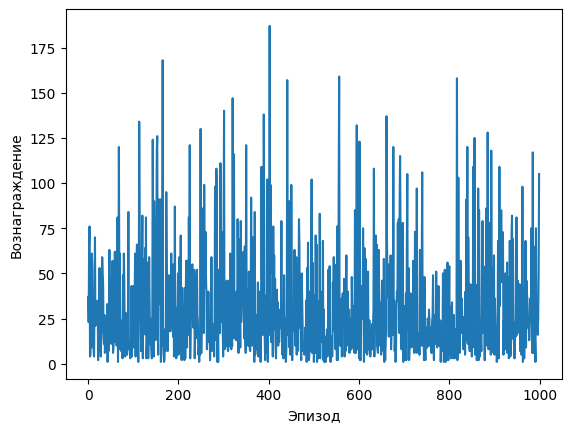

In [16]:
plt.plot(n_episode_training)
plt.xlabel('Эпизод')
plt.ylabel('Вознаграждение')
plt.show()

### Алгоритм восхождения на вершину

In [17]:
import gym
import torch
env = gym.make('CartPole-v1', render_mode = 'rgb_array')
env.reset()
n_state = env.observation_space.shape[0]
n_action = env.action_space.n

In [18]:
n_episode = 1000
best_total_reward = 0
best_weight = torch.rand(n_state, n_action)
total_rewards = []
noise_scale = 0.01

In [19]:
for episode in range(n_episode):
    # Теперь вес - это лучший вес + случайный шум, остальное без изменений
    weight = best_weight + noise_scale * torch.rand(n_state, n_action)
    total_reward = run_episode(env, weight)
    if total_reward >= best_total_reward:
        best_total_reward = total_reward
        best_weight = weight
    total_rewards.append(total_reward)
    print('Эпизод {}: {}'.format(episode + 1, total_reward))

Эпизод 1: 10.0
Эпизод 2: 10.0
Эпизод 3: 10.0
Эпизод 4: 9.0
Эпизод 5: 8.0
Эпизод 6: 9.0
Эпизод 7: 9.0
Эпизод 8: 9.0
Эпизод 9: 9.0
Эпизод 10: 9.0
Эпизод 11: 10.0
Эпизод 12: 9.0
Эпизод 13: 10.0
Эпизод 14: 10.0
Эпизод 15: 9.0
Эпизод 16: 10.0
Эпизод 17: 10.0
Эпизод 18: 9.0
Эпизод 19: 9.0
Эпизод 20: 10.0
Эпизод 21: 10.0
Эпизод 22: 9.0
Эпизод 23: 10.0
Эпизод 24: 10.0
Эпизод 25: 10.0
Эпизод 26: 10.0
Эпизод 27: 9.0
Эпизод 28: 9.0
Эпизод 29: 10.0
Эпизод 30: 10.0
Эпизод 31: 9.0
Эпизод 32: 9.0
Эпизод 33: 10.0
Эпизод 34: 10.0
Эпизод 35: 11.0
Эпизод 36: 9.0
Эпизод 37: 8.0
Эпизод 38: 10.0
Эпизод 39: 10.0
Эпизод 40: 10.0
Эпизод 41: 10.0
Эпизод 42: 8.0
Эпизод 43: 10.0
Эпизод 44: 10.0
Эпизод 45: 10.0
Эпизод 46: 9.0
Эпизод 47: 10.0
Эпизод 48: 10.0
Эпизод 49: 10.0
Эпизод 50: 10.0
Эпизод 51: 9.0
Эпизод 52: 10.0
Эпизод 53: 9.0
Эпизод 54: 10.0
Эпизод 55: 9.0
Эпизод 56: 11.0
Эпизод 57: 10.0
Эпизод 58: 9.0
Эпизод 59: 9.0
Эпизод 60: 11.0
Эпизод 61: 9.0
Эпизод 62: 9.0
Эпизод 63: 10.0
Эпизод 64: 10.0
Эпизод 65: 9

In [20]:
print('Среднее полное вознаграждение в {} эпизодах: {}'.format(n_episode, sum(total_rewards) / n_episode))

Среднее полное вознаграждение в 1000 эпизодах: 9.544


In [21]:
noise_scale = 0.01
best_total_reward = 0
total_rewards = []
for episode in range(n_episode):
    # Вес = это лучший вес + случайный шум
    weight = best_weight + noise_scale * torch.rand(n_state, n_action)
    total_reward = run_episode(env, weight)
    if total_reward >= best_total_reward:
        best_total_reward = total_reward
        best_weight = weight
        noise_scale = max(noise_scale / 2, 1e-4) # уменьшаем шум в 2 раза
    else:
        noise_scale = min(noise_scale * 2, 2) # увеличиваем шум в 2 раза
    print('Эпизод {}: {}'.format(episode + 1, total_reward))
    total_rewards.append(total_reward)

Эпизод 1: 10.0
Эпизод 2: 9.0
Эпизод 3: 10.0
Эпизод 4: 9.0
Эпизод 5: 10.0
Эпизод 6: 10.0
Эпизод 7: 10.0
Эпизод 8: 10.0
Эпизод 9: 10.0
Эпизод 10: 9.0
Эпизод 11: 8.0
Эпизод 12: 10.0
Эпизод 13: 9.0
Эпизод 14: 9.0
Эпизод 15: 10.0
Эпизод 16: 8.0
Эпизод 17: 9.0
Эпизод 18: 10.0
Эпизод 19: 10.0
Эпизод 20: 10.0
Эпизод 21: 10.0
Эпизод 22: 10.0
Эпизод 23: 9.0
Эпизод 24: 10.0
Эпизод 25: 10.0
Эпизод 26: 10.0
Эпизод 27: 9.0
Эпизод 28: 10.0
Эпизод 29: 9.0
Эпизод 30: 9.0
Эпизод 31: 9.0
Эпизод 32: 10.0
Эпизод 33: 11.0
Эпизод 34: 10.0
Эпизод 35: 10.0
Эпизод 36: 10.0
Эпизод 37: 10.0
Эпизод 38: 9.0
Эпизод 39: 10.0
Эпизод 40: 10.0
Эпизод 41: 10.0
Эпизод 42: 9.0
Эпизод 43: 9.0
Эпизод 44: 8.0
Эпизод 45: 9.0
Эпизод 46: 9.0
Эпизод 47: 27.0
Эпизод 48: 50.0
Эпизод 49: 35.0
Эпизод 50: 102.0
Эпизод 51: 80.0
Эпизод 52: 105.0
Эпизод 53: 84.0
Эпизод 54: 215.0
Эпизод 55: 262.0
Эпизод 56: 72.0
Эпизод 57: 244.0
Эпизод 58: 58.0
Эпизод 59: 48.0
Эпизод 60: 84.0
Эпизод 61: 179.0
Эпизод 62: 112.0
Эпизод 63: 70.0
Эпизод 64: 12

In [22]:
print('Среднее полное вознаграждение в {} эпизодах: {}'.format(n_episode, sum(total_rewards) / n_episode))

Среднее полное вознаграждение в 1000 эпизодах: 342.639


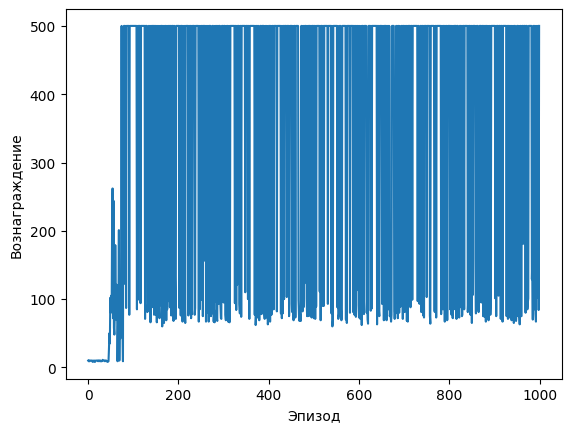

In [23]:
plt.plot(total_rewards)
plt.xlabel('Эпизод')
plt.ylabel('Вознаграждение')
plt.show()